In [1]:
%matplotlib inline
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate
import seaborn as sns
import itertools
from matplotlib.lines import Line2D
import matplotlib.pylab as plb
from sklearn.linear_model import LinearRegression
import matplotlib.style as style
from matplotlib.patches import Patch
#import pyam

#data_path = "/Users/Broccolee/Google Drive/Grad School/TU BERLIN/Negative Emissions & Carbon Markets/Data/"
data_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Data/"
plot_path = "/Users/kaylinlee/Desktop/KL_ISIpedia/Thesis/Code/Plots/"

pd.set_option('display.max_columns', 500)

In [2]:
#uploading data 
equity_remind=pd.read_excel(data_path+'REMIND_equity_analysis.xls')
equity_image=pd.read_excel(data_path+'IMAGE_equity_analysis.xls')
allmodels_df=pd.read_excel(data_path+'MASTERDF_equity_analysis.xls') #master datafram with all regions from IMAGE and REMIND
allmodels_equal_df=pd.read_excel(data_path+'allmodels_df.xls') #consolidated with REMIND regions

In [3]:
regions_rem = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA', 'World']
regions_ima = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU', 'World']
#regions_mes = ['CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM',
# 'R11_MEA', 'R11_PAO', 'R11_PAS', 'USA', 'World']

regions_rem_noworld = ['AFR', 'CHN', 'EUR', 'IND', 'JPN', 'LAM', 'MEA', 'OAS', 'ROW', 'RUS', 'USA']
regions_ima_noworld = ['BRA', 'CAN', 'CEU', 'CHN', 'EAF', 'INDIA', 'INDO', 'JAP', 'KOR', 'ME', 'MEX', 'NAF',
 'OCE', 'RCAM', 'RSAF', 'RSAM', 'RSAS', 'RUS', 'SAF', 'SEAS', 'STAN', 'TUR', 'UKR',
 'USA', 'WAF', 'WEU']
#regions_mes_noworld = ['CHN', 'EU', 'IND', 'R11_AFR', 'R11_FSU', 'R11_LAM',
# 'R11_MEA', 'R11_PAO', 'R11_PAS',  'USA']

In [5]:
allmodels_equal_df.Scenario.unique()

array(['SSP1-19-SPA1-V17', 'SSP2-19-SPA2-V17', 'SSP1-26-SPA1-V17',
       'SSP2-26-SPA2-V17', 'SSP5-19-SPA5-V17', 'SSP5-26-SPA5-V17',
       'SSP1-19-SPA0-V17', 'SSP2-LF-SPA2-V17'], dtype=object)

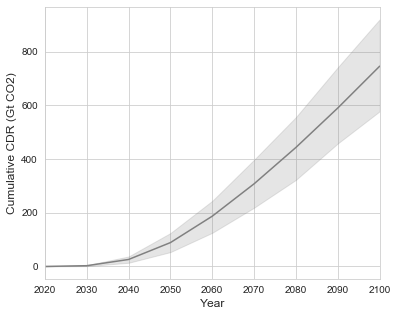

In [127]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,5))
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]

data=allmodels_df.loc[(allmodels_df.Region==('World'))].copy()
data['CUM_BECCS']=data['CUM_BECCS']*10**-3

cum_line=sns.lineplot(x='Year',y='CUM_BECCS',
             data=data, 
             color='grey', 
             #hue="Region",
             legend=False)

#cum_line.set_title('Modeled cumulative CDR over the course of 21st century', fontsize=14)
cum_line.set_ylabel('Cumulative CDR (Gt CO2)',fontsize=12) 
cum_line.set_xlabel('Year', fontsize=12)
cum_line.set_xlim([2020,2100])

plt.savefig(plot_path + 'CUM_CDR_over_time_world.png',bbox_inches="tight")

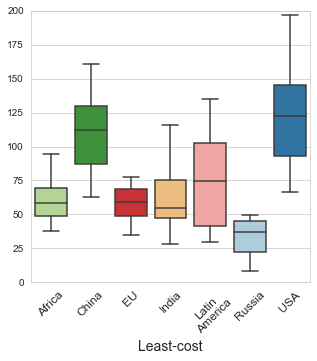

In [125]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,5))

reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
data=allmodels_equal_df.loc[(allmodels_equal_df.Year==(2100))&(allmodels_equal_df.Region.isin(reg))
                           ][['Region','CUM_BECCS']]
data['CUM_BECCS']=data['CUM_BECCS']*10**-3

LC_box = sns.boxplot(x="Region", y="CUM_BECCS", data=data, palette=colour_palette)
LC_box.set_title('', fontsize=14)
LC_box.set(ylabel='', ylim=[0,200],xlabel='Least-cost')
LC_box.set_xticklabels(['Africa', 'China','EU','India','Latin\nAmerica','Russia','USA'], 
                       rotation=45, 
                       fontsize=12)

plt.savefig(plot_path + 'CUM_CDR_reg_distribution_2100.png',bbox_inches="tight")

In [133]:
allmodels_equal_df.loc[(allmodels_equal_df.Year==(2100))&(allmodels_equal_df.Region.isin(reg))
                           ][['Region',"CUM_BECCS"]].groupby('Region').describe()

CUM_BECCS                                                    \
           count          mean           std       min         25%   
Region                                                               
AFR          8.0   61726.19750  19384.360613  37779.44  49213.8325   
CHN          8.0  109556.80875  32604.636913  62574.94  87166.3275   
EUR          8.0   58149.09000  14633.282888  34534.44  49158.4325   
IND          8.0   62523.87375  27309.272904  28590.73  47476.4925   
LAM          8.0   75665.24875  38391.423600  29535.89  41525.1600   
RUS          8.0   33492.19750  15469.218688   8240.68  22719.6675   
USA          8.0  123185.38500  42600.896460  66828.93  92652.9600   

                                            
               50%          75%        max  
Region                                      
AFR      58297.470   69490.3175   94828.44  
CHN     111861.630  129723.9150  161023.04  
EUR      59467.990   68851.9475   77819.34  
IND      54822.180   75454.7200  116030.95  
LAM      74364.520  102444.7650  135177.24  
RUS      37278.420   45506.6175   49920.94  
USA     122234.055  145074.1375  196610.65

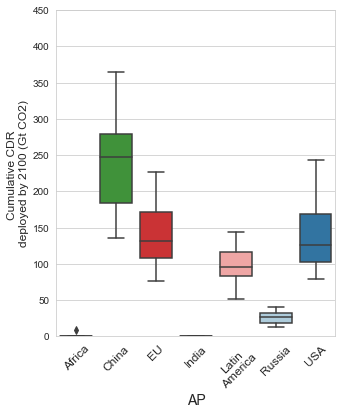

In [129]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,6))

reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
data=allmodels_equal_df.loc[(allmodels_equal_df.Year==(2100))&(allmodels_equal_df.Region.isin(reg))
                           ][['Region','CUM_BECCS_fair_share_by_GDP']]
data['CUM_BECCS_fair_share_by_GDP']=data['CUM_BECCS_fair_share_by_GDP']*10**-3

AP_box = sns.boxplot(x="Region", y=('CUM_BECCS_fair_share_by_GDP'), data=data, palette=colour_palette)
#AP_box.set_title('Least-cost', fontsize=14)
AP_box.set_ylabel('Cumulative CDR \ndeployed by 2100 (Gt CO2)',fontsize=12) 
AP_box.set(ylim=[0,450], xlabel='AP')
AP_box.set_xticklabels(['Africa', 'China','EU','India','Latin\nAmerica','Russia','USA'], 
                       rotation=45, 
                       fontsize=12)

plt.savefig(plot_path + 'CUM_AP_CDR_reg_distribution_2100.png',bbox_inches="tight")

In [134]:
allmodels_equal_df.loc[(allmodels_equal_df.Year==(2100))&(allmodels_equal_df.Region.isin(reg))
                           ][['Region','CUM_BECCS_fair_share_by_GDP']].groupby('Region').describe()

CUM_BECCS_fair_share_by_GDP                                         \
                             count          mean           std        min   
Region                                                                      
AFR                            8.0    1098.93375   3108.254027       0.00   
CHN                            8.0  239640.57375  74280.247451  135779.52   
EUR                            8.0  139497.68125  51152.688849   76150.22   
IND                            8.0       0.00000      0.000000       0.00   
LAM                            8.0   98113.18000  31774.501854   51745.66   
RUS                            8.0   25628.80750   9491.376853   13667.48   
USA                            8.0  140363.91250  56637.108014   79098.67   

                                                         
                25%         50%          75%        max  
Region                                                   
AFR          0.0000       0.000       0.0000    8791.47  
CHN     184444.5025  247369.615  279448.5900  364417.93  
EUR     108247.1875  131004.085  171345.5050  226761.33  
IND          0.0000       0.000       0.0000       0.00  
LAM      83184.5725   95740.175  116527.9650  144014.66  
RUS      18685.3625   26248.110   31790.5175   40576.02  
USA     102843.6150  126014.000  169485.2225  243557.06

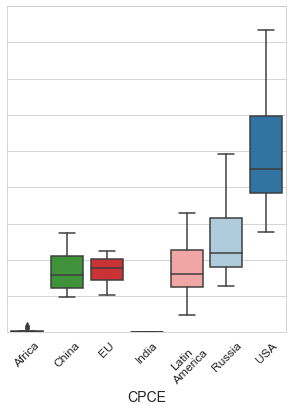

In [124]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,6))

reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
data=allmodels_equal_df.loc[(allmodels_equal_df.Year==(2100))&(allmodels_equal_df.Region.isin(reg))
                           ][['Region','CUM_BECCS_fair_share_by_CUM_POP']]
data['CUM_BECCS_fair_share_by_CUM_POP']=data['CUM_BECCS_fair_share_by_CUM_POP']*10**-3

CPCE_box = sns.boxplot(x="Region", y='CUM_BECCS_fair_share_by_CUM_POP', data=data, palette=colour_palette)
#CPCE_box.set_title('Least-cost', fontsize=14)
CPCE_box.set(ylabel='', yticklabels='',ylim=[0,450],xlabel='CPCE')
CPCE_box.set_xticklabels(['Africa', 'China','EU','India','Latin\nAmerica','Russia','USA'], 
                       rotation=45, 
                       fontsize=12)


plt.savefig(plot_path + 'CUM_CPCE_CDR_reg_distribution_2100.png',bbox_inches="tight")

In [135]:
allmodels_equal_df.loc[(allmodels_equal_df.Year==(2100))&(allmodels_equal_df.Region.isin(reg))
                           ][['Region','CUM_BECCS_fair_share_by_CUM_POP']].groupby('Region').describe()

CUM_BECCS_fair_share_by_CUM_POP                                         \
                                 count          mean           std        min   
Region                                                                          
AFR                                8.0    1783.60375   3413.776547       0.00   
CHN                                8.0   84753.92750  30170.082501   48604.75   
EUR                                8.0   85345.55750  23296.788283   51601.18   
IND                                8.0       0.00000      0.000000       0.00   
LAM                                8.0   90429.30125  47570.099592   23341.20   
RUS                                8.0  127780.34625  61105.752364   64046.49   
USA                                8.0  247418.18125  92766.023889  138030.48   

                                                         
                25%         50%          75%        max  
Region                                                   
AFR          0.0000       0.000    1379.4350    8751.09  
CHN      61399.1550   78584.295  105601.5950  137544.30  
EUR      72258.4800   89131.770  101656.0525  112843.27  
IND          0.0000       0.000       0.0000       0.00  
LAM      62752.4300   81164.675  113743.8375  164243.31  
RUS      90036.0050  109554.865  157443.0750  246655.29  
USA     193011.1575  225281.530  298047.9025  417282.87

In [12]:
#prepare df for boxplots

boxplot_df = allmodels_equal_df.melt(id_vars=['MODEL', 'Scenario', 'Region', 'Year'], 
                                         value_vars=['Total_CO2', 'BECCS', 'CUM_BECCS',
                                                     'LANDCDR','CUM_BECCS_fair_share_by_GDP', 
                                                     'CUM_BECCS_fair_share_by_CUM_POP',
       'TOTAL_CDR', 'CO2_Emissions', 'CUM_CO2', 'CUM_CDR', 'Unit_CO2',
       'Population', 'GDP', 'Unit_Population', 'cumPopulation', 'Unit_GDP',
       'GDP_cap', 'GDP_cap_avg', 'GDP_cap_CoI_nan', 'GDP_cap_CoI',
       'GDP_CoI_nan', 'GDP_CoI', 'GDP_CoI_frac', 'CDR_fair_share_by_GDP',
       'CUM_CDR_fair_share_by_GDP', 'Global_CUM_CO2_by_CUM_POP',
       'Fair_share_by_CUM_POP', 'Excess_emissions_by_CUM_POP',
       'Exc_em_fac_by_CUM_POP']).reset_index()


/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


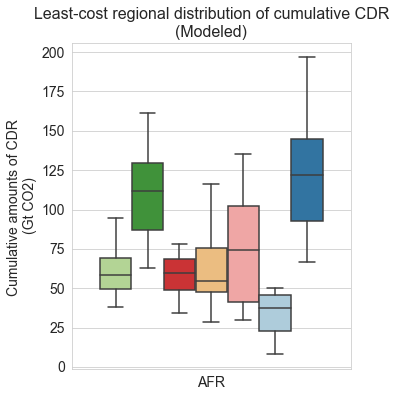

In [40]:
#boxplot1 - cum BECCS and fair shares of cum BECCS by 2100
sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']

boxp_2100 = boxplot_df.loc[(boxplot_df.Region.isin(reg)) &
                            (boxplot_df.Year==(2100)) &
                            (boxplot_df.variable==('CUM_BECCS'))]
boxp_2100['value']=boxp_2100['value'].astype(float)*10**-3

plt.figure(figsize=(5,6))

box2100=sns.boxplot(
    data = boxp_2100,
    x = 'variable', 
    y = 'value',
    hue = 'Region', 
    palette=colour_palette,
    #dodge=False,
    showfliers=False)

box2100.set(ylabel="Cumulative amounts of CDR \n(Gt CO2)", xlabel=''
            ,xticklabels=['AFR','CHN','EUR'])#,'IND','LAM', 'RUS', 'USA'])
#box2100.set(xticklabels=('AFR','CHN','EUR','IND','LAM', 'RUS', 'USA'))
box2100.tick_params(labelsize=14)
box2100.set_title('Least-cost regional distribution of cumulative CDR\n(Modeled)', fontsize=16)
box2100.legend_.remove()
#box2100.legend(loc='upper right')
#box2100.set_ylim([-200,500])
#plt.savefig(plot_path + 'BECCS_regional_differences_2100.png',bbox_inches="tight")

/Users/kaylinlee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


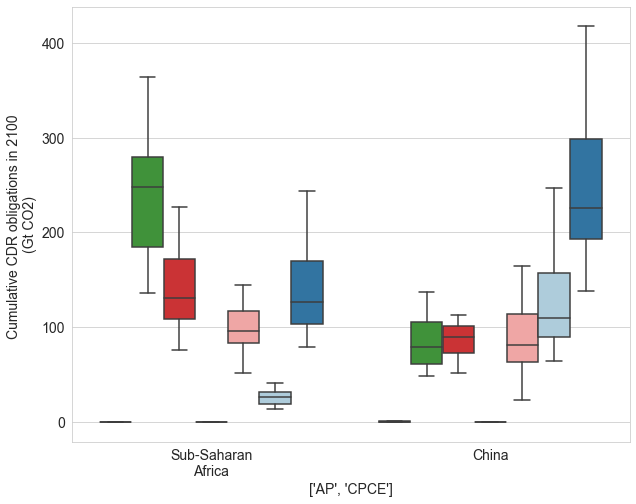

In [96]:
#boxplot1 - cum BECCS and fair shares of cum BECCS by 2100
sns.set_style('whitegrid')
sns.set_context(font_scale=1, rc={"axes.labelsize":14})

colours = sns.color_palette("Paired",12)
colour_palette =[colours[2],colours[3],colours[5],colours[6],colours[4],colours[0],colours[1]]
reg=['AFR','CHN','EUR','IND','LAM', 'RUS', 'USA']
variab = ['CUM_BECCS_fair_share_by_GDP', 'CUM_BECCS_fair_share_by_CUM_POP']

boxp_2100 = boxplot_df.loc[(boxplot_df.Region.isin(reg)) &
                            (boxplot_df.Year==(2100)) &
                            (boxplot_df.variable.isin(variab))]
boxp_2100['value']=boxp_2100['value'].astype(float)*10**-3
plt.figure(figsize=(10,8))
box2100=sns.boxplot(
    data = boxp_2100,
    x = 'variable', 
    y = 'value',
    hue = 'Region', 
    palette=colour_palette,
    order=['CUM_BECCS_fair_share_by_GDP', 'CUM_BECCS_fair_share_by_CUM_POP'],
    showfliers=False)

box2100.set(ylabel="Cumulative CDR obligations in 2100 \n(Gt CO2)",xlabel = ['AP','CPCE'])
ticks = box2100.get_xticks()
box2100.set_xticks(ticks[0:])
box2100.set(xticklabels=['Sub-Saharan\nAfrica', 'China','EU','India','Latin\nAmerica','Russia','USA'])
box2100.tick_params(labelsize=14)
box2100.legend_.remove()

#box2100.legend(loc='upper right')
#box2100.set_ylim([-200,500])
#plt.savefig(plot_path + 'BECCS_regional_differences_2100.png',bbox_inches="tight")